In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [19]:
def plot_points(x, y, title_name):
    plt.title(title_name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x, y)
    plt.show()

In [20]:
def plot_line(w, b, title_name):
    plt.title(title_name)
    plt.xlabel('x')
    plt.ylabel('y')
    x = np.linspace(0.0, 2.0, num=100)
    y = w * x + b
    plt.plot(x, y)
    plt.show()

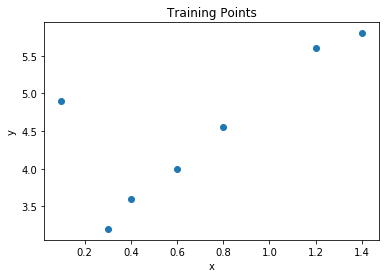

In [21]:
train_X = np.array([30.0, 40.0, 60.0, 80.0, 10.0, 120.0, 140.0])
train_Y = np.array([320.0, 360.0, 400.0, 455.0, 490.0, 560.0, 580.0])
train_X /= 100.0
train_Y /= 100.0
plot_points(train_X, train_Y, title_name = 'Training Points')

In [22]:
x = tf.placeholder(tf.float32, None)
y = tf.placeholder(tf.float32, None)
w = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')
y_pred = tf.add(tf.multiply(w, x), b)

In [23]:
n_samples = train_X.shape[0]
cost = tf.reduce_sum(tf.pow((y_pred - y), 2)) / n_samples
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [29]:
training_epoch = 1000
display_step = 50

Iteration: 0001 | Loss: 7.406539 | W:-0.442908 | b: -0.719435


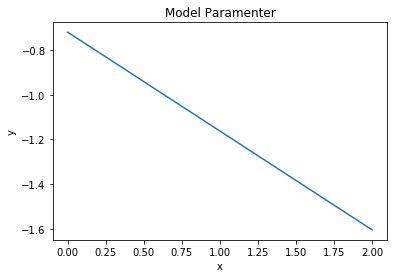

Iteration: 0051 | Loss: 0.262033 | W:1.645538 | b: 2.153364


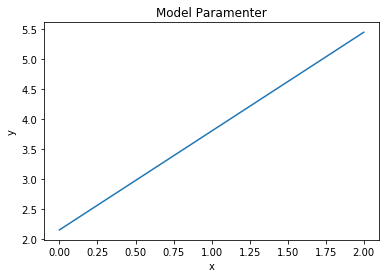

Iteration: 0101 | Loss: 0.003026 | W:2.025798 | b: 2.819572


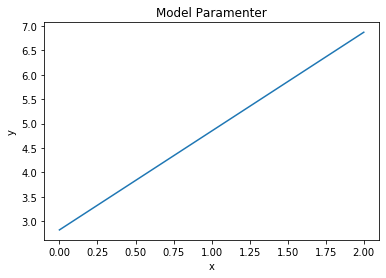

Iteration: 0151 | Loss: 0.000846 | W:2.048864 | b: 3.007904


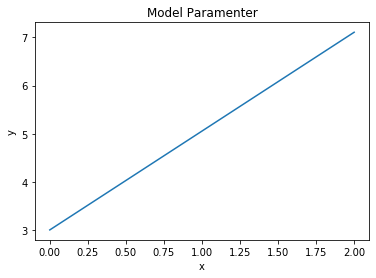

Iteration: 0201 | Loss: 0.001235 | W:2.002548 | b: 3.088607


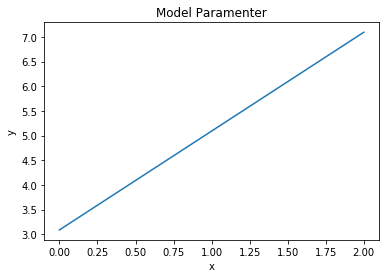

Iteration: 0251 | Loss: 0.000672 | W:1.947531 | b: 3.141464


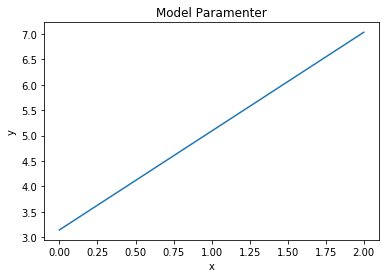

Iteration: 0301 | Loss: 0.000216 | W:1.896051 | b: 3.184112


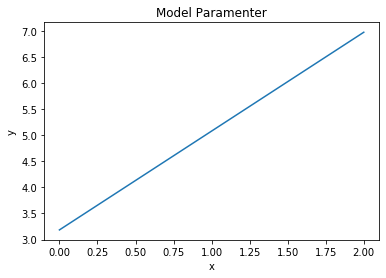

Iteration: 0351 | Loss: 0.000017 | W:1.850077 | b: 3.220827


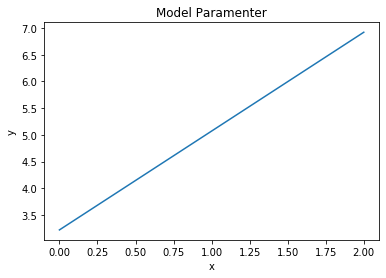

Iteration: 0401 | Loss: 0.000028 | W:1.809461 | b: 3.252976


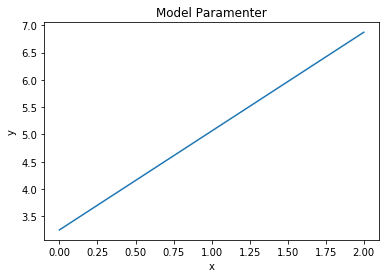

Iteration: 0451 | Loss: 0.000184 | W:1.773673 | b: 3.281241


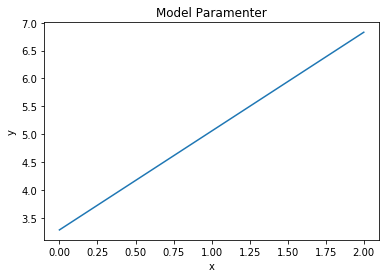

Iteration: 0501 | Loss: 0.000437 | W:1.742159 | b: 3.306117


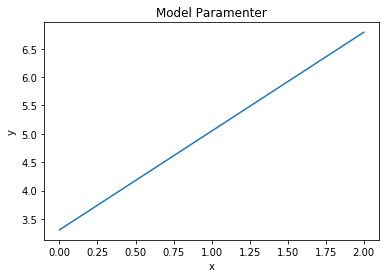

Iteration: 0551 | Loss: 0.000749 | W:1.714414 | b: 3.328015


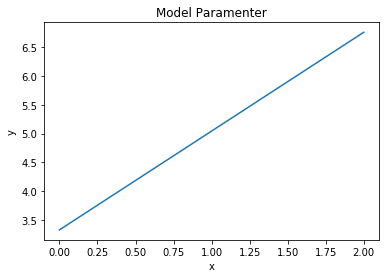

Iteration: 0601 | Loss: 0.001093 | W:1.689987 | b: 3.347294


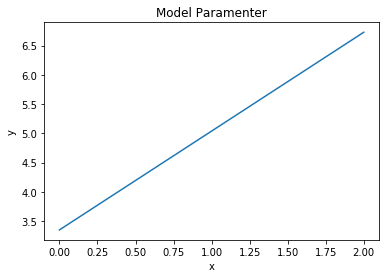

Iteration: 0651 | Loss: 0.001449 | W:1.668481 | b: 3.364269


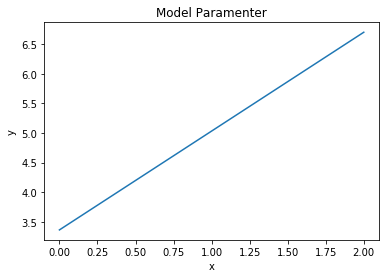

Iteration: 0701 | Loss: 0.001804 | W:1.649546 | b: 3.379212


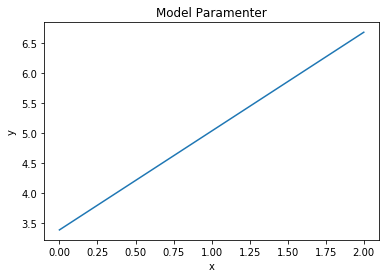

Iteration: 0751 | Loss: 0.002149 | W:1.632877 | b: 3.392368


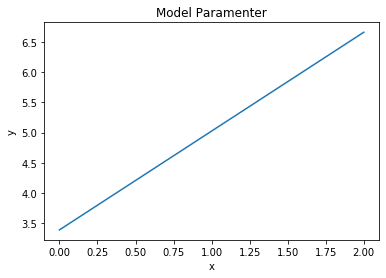

Iteration: 0801 | Loss: 0.002477 | W:1.618203 | b: 3.403950


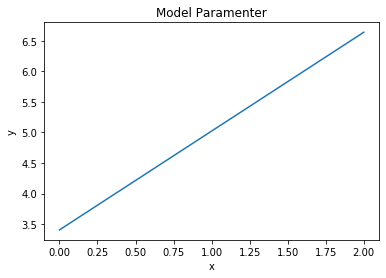

Iteration: 0851 | Loss: 0.002786 | W:1.605282 | b: 3.414148


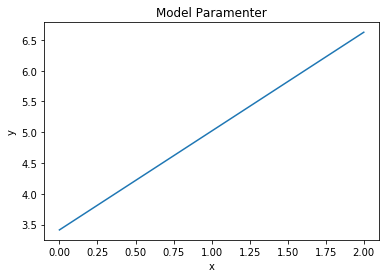

Iteration: 0901 | Loss: 0.003072 | W:1.593907 | b: 3.423126


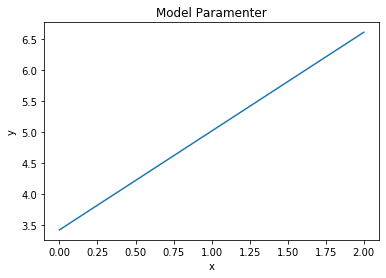

Iteration: 0951 | Loss: 0.003336 | W:1.583892 | b: 3.431030


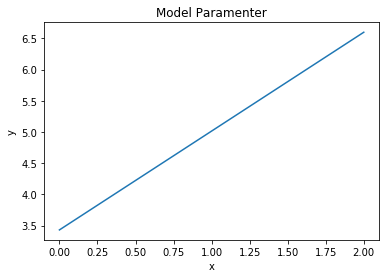

Training loss: 0.003573 | w: 1.575241 | b: 3.437856


In [30]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for epoch in range(training_epoch):
        for (x_train, y_train) in zip(train_X, train_Y):
            _, loss, current_w, current_b = sess.run([optimizer, cost, w, b], feed_dict={x: x_train, y: y_train})
        if epoch % display_step == 0:
            print('Iteration: %04d | Loss: %.6f | W:%.6f | b: %.6f'
                 %(epoch + 1, loss, current_w, current_b))
            plot_line(current_w, current_b, 'Model Paramenter')
    print('Training loss: %.6f | w: %.6f | b: %.6f' % (loss, sess.run(w), sess.run(b)))